In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
style.use('ggplot')

# Proyecto #1 Python Master Data Science Galileo

## 2) 

In [3]:
# Cargan los datos
arr = np.load('proyecto_training_data.npy', allow_pickle=False)

# Preprocesamiento para reemplazar infinitos por NaN
# Nota: np.inf captura tanto positivos como negativos infinitos
arr = np.where(np.isinf(arr), np.nan, arr)

# Se mezcla aleatoriamente los datos dentro del arr
np.random.shuffle(arr)

# Seleccionar el 80% del arreglo para entrenamiento y el 20% restante para test
pct = int(arr.shape[0] * 0.8)
ochenta_x_ciento = arr[:pct]
test = arr[pct:]

# Conversión a DataFrame
columnas = ['SalePrice', 'OverallQual', 'First Floor Square Feet', 'totRoomAbov', 'YearBuilt', 'LinearFeetStrconnecproperty']
ochenta_x_ciento_df = pd.DataFrame(ochenta_x_ciento, columns=columnas)
test_df = pd.DataFrame(test, columns=columnas)

# Verificar las formas de los conjuntos de datos
print(ochenta_x_ciento_df.shape, test_df.shape)


#print(ochenta_x_ciento[0:5])
#verifico que los tamanos de los array sean correctos
print('El tamano del arr es de: ',len(arr)/1460)
print ('El tamano del 80% es de: ',len(ochenta_x_ciento)/1460)
print ('El tamano del test o 20% es de: ',len(test)/1460)
print('----------------------------')
#print(test)


print("Tamaño del 80% del arreglo:", len(ochenta_x_ciento))
#print(primeros_80_por_ciento)

(1168, 6) (292, 6)
El tamano del arr es de:  1.0
El tamano del 80% es de:  0.8
El tamano del test o 20% es de:  0.2
----------------------------
Tamaño del 80% del arreglo: 1168


### 3)

In [5]:
# primera manera x todo el dataframe en general
media = np.nanmean(ochenta_x_ciento)
valor_maximo = np.nanmax(ochenta_x_ciento)
valor_minimo = np.nanmin(ochenta_x_ciento)
desviacion_estandar = np.nanstd(ochenta_x_ciento)

print('La media es:', media)
print('El valor máximo es:', valor_maximo)
print('El valor mínimo es:', valor_minimo)
print('El rango es:', valor_maximo - valor_minimo)
print('La desviación estándar es:', desviacion_estandar)
print('-----------------------------')


#segunda manera por cada una de los datos
ochenta_x_ciento_df.describe()

La media es: 31492.787700456083
El valor máximo es: 611657.0
El valor mínimo es: 1.0
El rango es: 611656.0
La desviación estándar es: 74537.86092192373
-----------------------------


,SalePrice,OverallQual,First Floor Square Feet,totRoomAbov,YearBuilt,LinearFeetStrconnecproperty
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,957.000000
mean,180058.637842,6.096747,1167.279110,6.504281,1971.608733,70.062696
std,75376.584904,1.378643,390.629623,1.610798,29.952579,24.378557
min,35311.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,130000.000000,5.000000,882.000000,5.000000,1954.000000,60.000000
50%,164000.000000,6.000000,1088.000000,6.000000,1973.000000,70.000000
75%,213625.000000,7.000000,1414.000000,7.000000,2000.000000,80.000000
max,611657.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


## 4)

/Users/yeltsin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


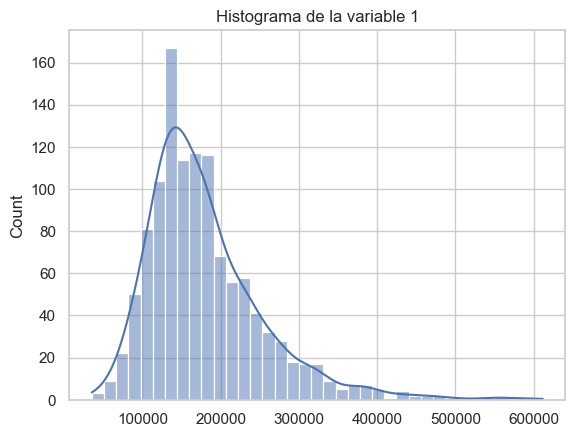

/Users/yeltsin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


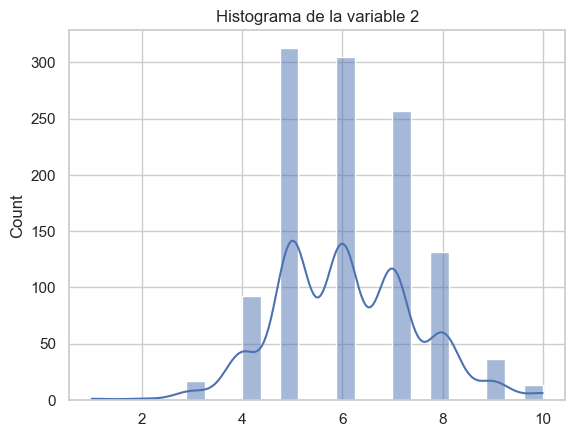

/Users/yeltsin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


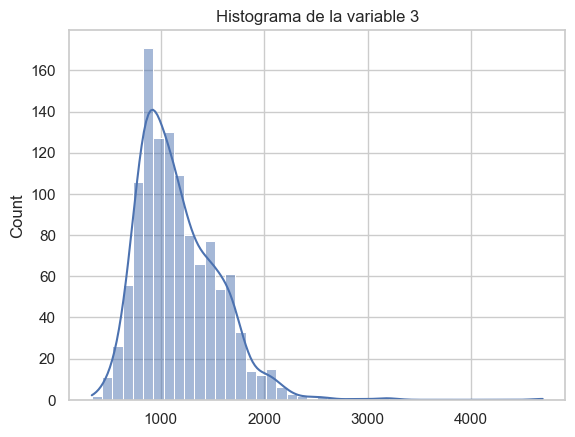

/Users/yeltsin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


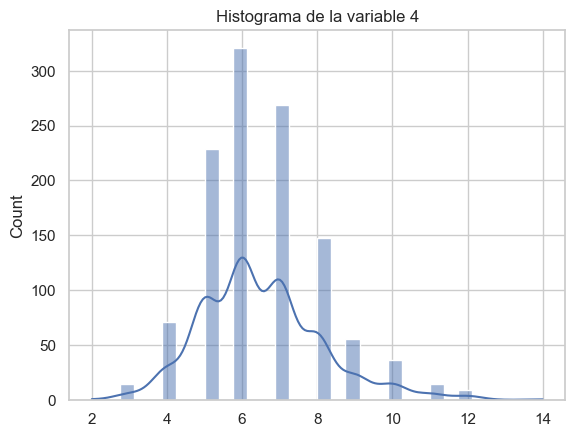

/Users/yeltsin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


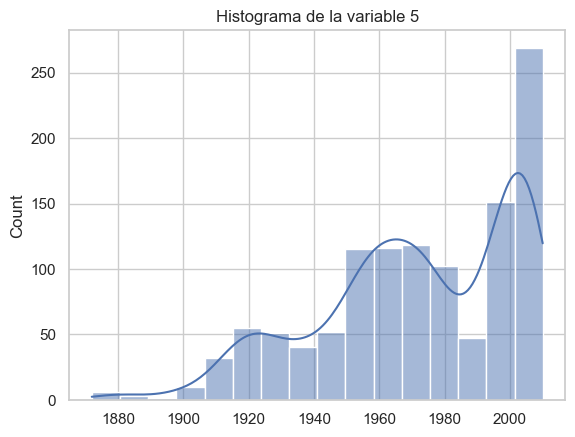

/Users/yeltsin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


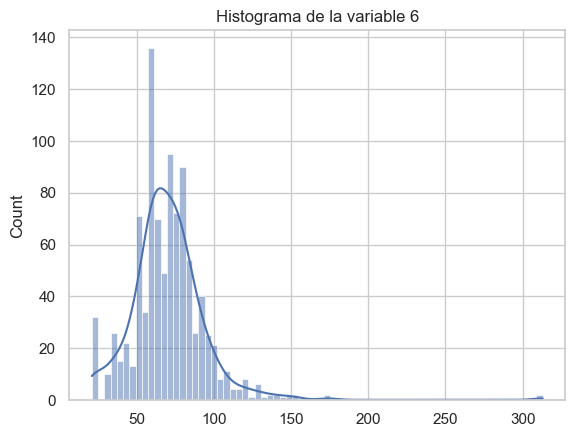

In [9]:

# Configura el estilo de los gráficos
sns.set(style='whitegrid')

# Sabemos que es un arreglo 2D donde cada columna es una variable
for i in range(ochenta_x_ciento.shape[1]):
    plt.figure()  # Crea una nueva figura para cada histograma
    sns.histplot(ochenta_x_ciento[:, i], kde=True)  # kde=True agrega una estimación de densidad kernel
    plt.title(f'Histograma de la variable {i+1}')
    plt.show()


## 5)

## Calcular el coeficiente de correlaci ́on entre x y y.

In [12]:
# Calcular el número de variables independientes
# Asumimos que la última columna es 'Y'
numero_variables_independientes = ochenta_x_ciento.shape[1] - 1

print("Número de variables independientes en el arreglo:", numero_variables_independientes)


# ya que sabemos que la última columna es 'y'
y = ochenta_x_ciento[:, -1]

# se trata los valores nan en 'y'
my = np.ma.array(y, mask=np.isnan(y))

# Calculamos el coeficiente de correlación para cada variable independiente 'x', manejando los NaN
for i in range(ochenta_x_ciento.shape[1] - 1):  # Excluimos la última columna que es 'y'
    x = ochenta_x_ciento[:, i]
    
    # tratar los valores NaN en 'x'
    mx = np.ma.array(x, mask=np.isnan(x))
    
    # Calcular el coeficiente de correlación, ignorando los NaN
    coef_correlacion = np.ma.corrcoef(mx, my)[0, 1]  # Obtiene el coeficiente de correlación entre x y y, ignorando NaN
    
    # Verificar si el resultado es un número válido (puede no serlo si todo son NaN)
    if np.ma.is_masked(coef_correlacion):
        print(f"No se pudo calcular el coeficiente de correlación para la variable independiente {i+1} debido a datos insuficientes.")
    else:
        print(f"Coeficiente de correlación entre la variable independiente {i+1} y y: {coef_correlacion}")


Número de variables independientes en el arreglo: 5
Coeficiente de correlación entre la variable independiente 1 y y: 0.3060183095979052
Coeficiente de correlación entre la variable independiente 2 y y: 0.22130316548095572
Coeficiente de correlación entre la variable independiente 3 y y: 0.45957348609391047
Coeficiente de correlación entre la variable independiente 4 y y: 0.3461213618922599
Coeficiente de correlación entre la variable independiente 5 y y: 0.08986801091217189


## Graficar x vs y(scatterplot) usando matplotlib.

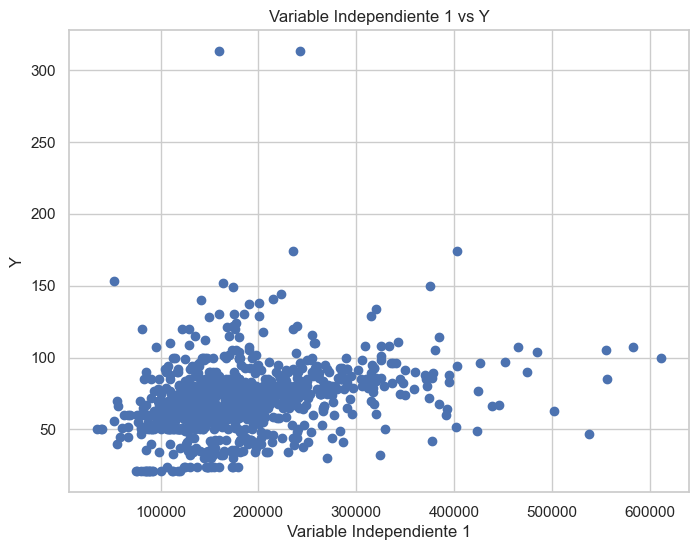

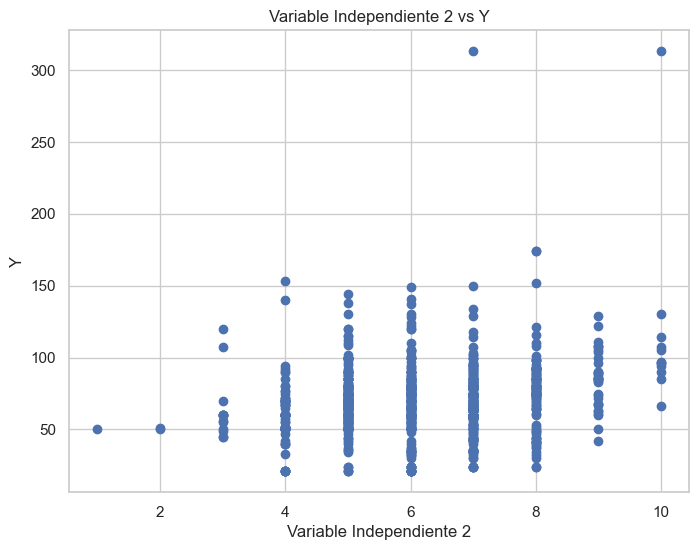

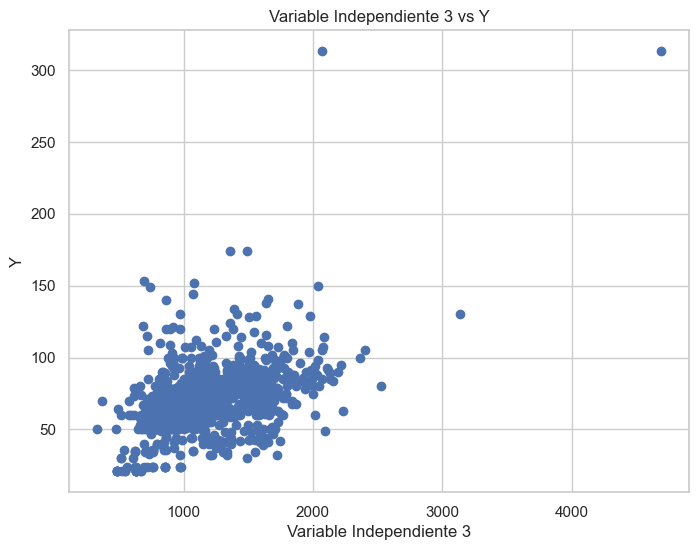

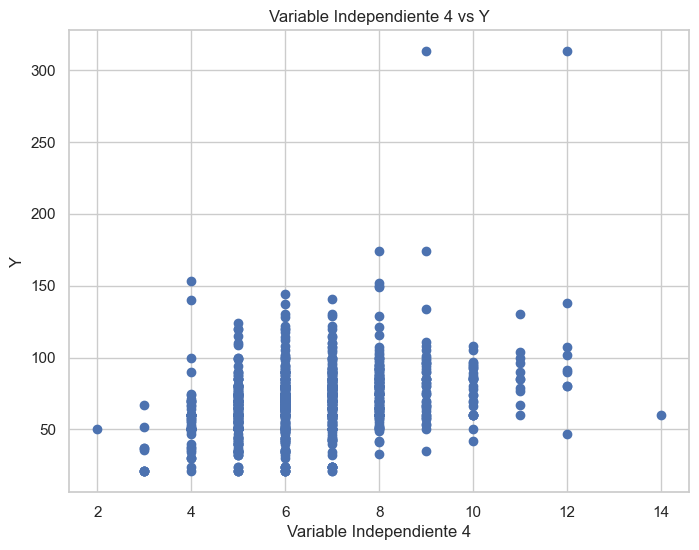

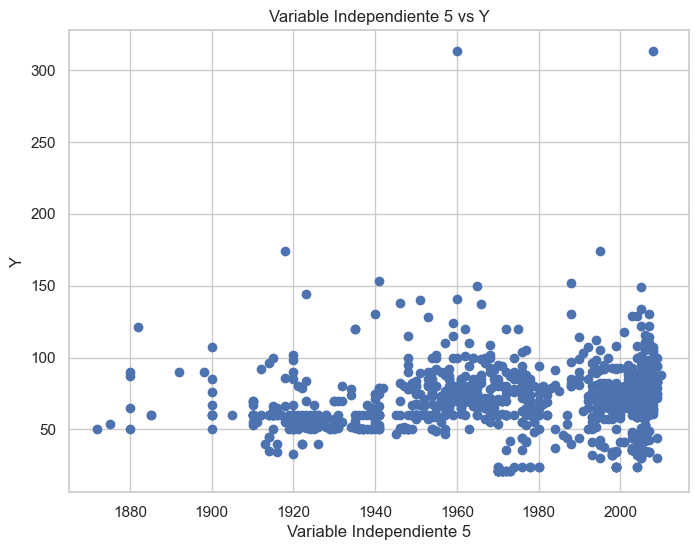

[68. 60. 80. ... 35. 24. 66.]


In [14]:


# Graficar x vs y para cada variable independiente 'x'
for i in range(numero_variables_independientes):
    x = ochenta_x_ciento[:, i]
    plt.figure(figsize=(8, 6))  # Configura el tamaño del gráfico
    plt.scatter(x, y)  # Crea un scatter plot de x vs y
    plt.title(f'Variable Independiente {i+1} vs Y')
    plt.xlabel(f'Variable Independiente {i+1}')
    plt.ylabel('Y')
    plt.grid(True)  # Añade una cuadrícula para mejor visualización
    plt.show()
print(y)


## Colocar el coeficiente de correlaci ́on y colocarlo como parte del t ́ıtulo de la gr ́afica.

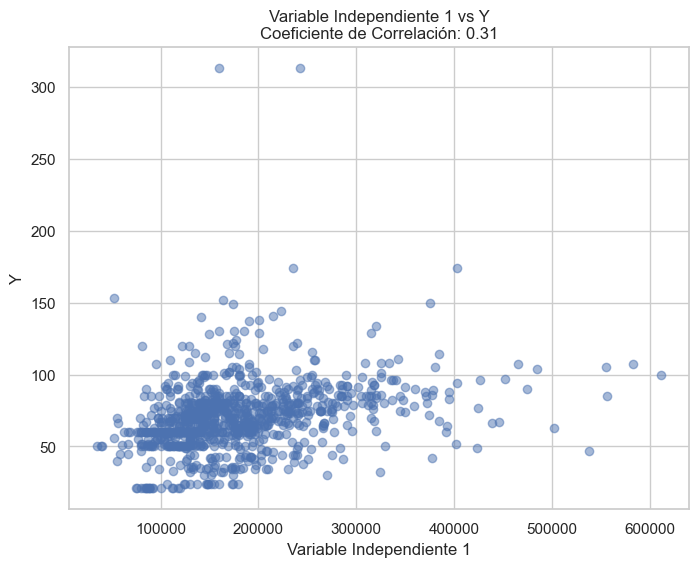

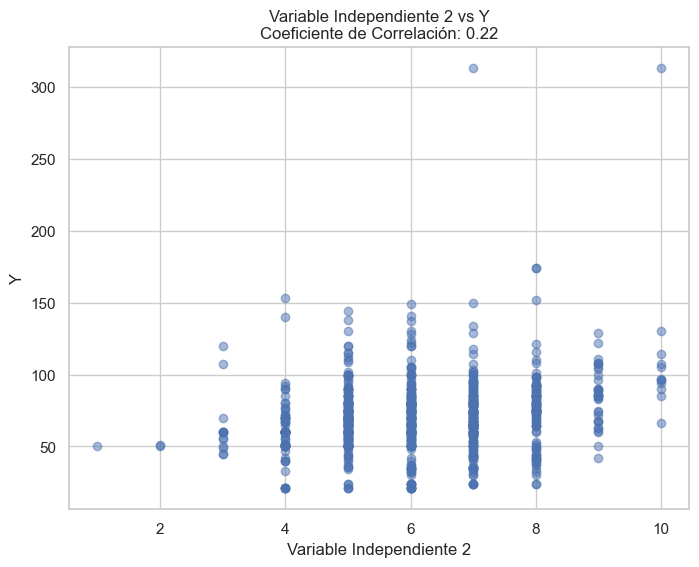

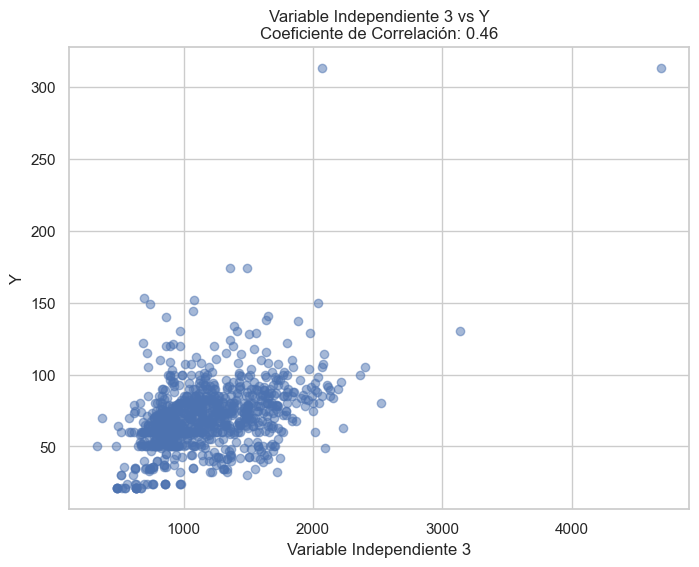

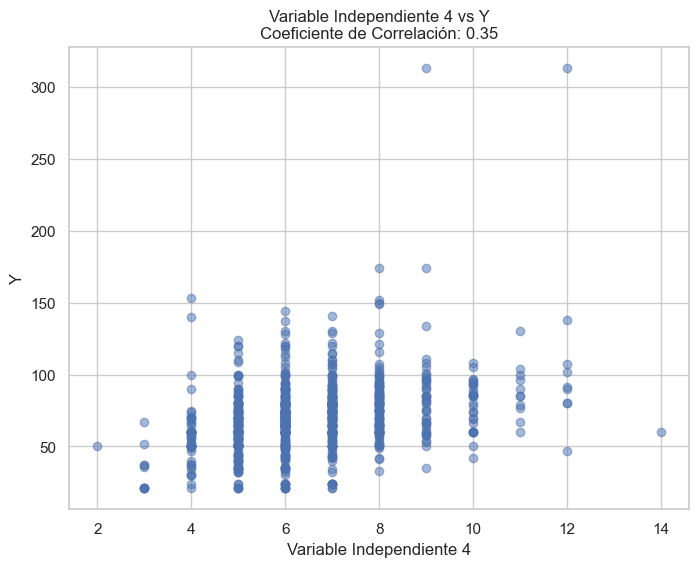

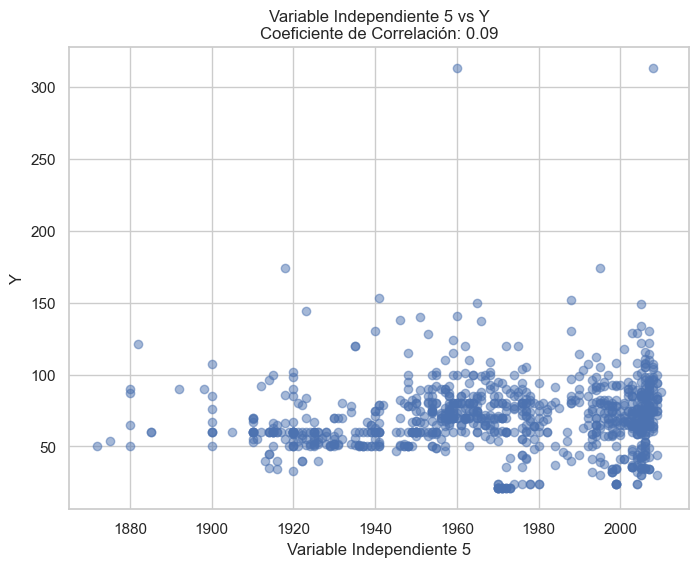

In [16]:



# sacando coeficiente de correlacion y colocandolo de titulo
num_variables_independientes = ochenta_x_ciento.shape[1] - 1

for i in range(num_variables_independientes):
    x = ochenta_x_ciento[:, i]
    # Calcular el coeficiente de correlación, ignorando NaNs
    coef_correlacion = np.ma.corrcoef(np.ma.masked_invalid(x), np.ma.masked_invalid(y))[0, 1]
    
    plt.figure(figsize=(8, 6))  # Configura el tamaño del gráfico
    plt.scatter(x, y, alpha=0.5)  # Crea un scatter plot de x vs y
    # Usar el coeficiente de correlación en el título, formateando para mostrar solo 2 decimales
    plt.title(f'Variable Independiente {i+1} vs Y\nCoeficiente de Correlación: {coef_correlacion:.2f}')
    plt.xlabel(f'Variable Independiente {i+1}')
    plt.ylabel('Y')
    plt.grid(True)  # Añade una cuadrícula para mejor visualización
    plt.show()


## Basado en la gr ́afica y el coeficiente de correlaci ́on de cada par x,y elegir las 2 variables con m ́as potencial predictivo es decir las 2 variables que presentan mayor correlaci ́on entre dicha variable y la variable dependiente.

In [19]:

correlaciones_sin_nan = []

for i in range(ochenta_x_ciento.shape[1] - 1):  # Excluimos la última columna que es 'y'
    x = ochenta_x_ciento[:, i]
    
    # Excluir pares x, y donde cualquiera de los dos tenga solo valores NaN
    indices_validos = ~np.isnan(x) & ~np.isnan(y)  # ~ es el operador NOT para negar la condición de isnan
    if np.sum(indices_validos) > 1:  # Asegurarse de que haya al menos dos pares de datos no-NaN para calcular
        coef_correlacion = np.corrcoef(x[indices_validos], y[indices_validos])[0, 1]
        if not np.isnan(coef_correlacion):  # Asegurar que el coeficiente no sea NaN
            correlaciones_sin_nan.append((i, coef_correlacion))

# Ordenar las correlaciones por el valor absoluto del coeficiente, de mayor a menor
correlaciones_ordenadas_sin_nan = sorted(correlaciones_sin_nan, key=lambda x: abs(x[1]), reverse=True)

# Seleccionar las dos variables con mayor correlación
dos_mejores_sin_nan = correlaciones_ordenadas_sin_nan[:2]

print("Las 2 variables con más potencial predictivo (mayor correlación con y) sin NaN son:")
for indice, coef in dos_mejores_sin_nan:
    print(f"Variable {indice+1} con coeficiente de correlación: {coef}")



Las 2 variables con más potencial predictivo (mayor correlación con y) sin NaN son:
Variable 3 con coeficiente de correlación: 0.4595734860939104
Variable 4 con coeficiente de correlación: 0.34612136189225995


## 6) y 7) Crear una funci ́on para entrenar un modelo de regresi ́on lineal de una variable y = β0 + β1 ∗ x. La funci ́on recibe como argumentos:


In [50]:
class linear_reg():
    def __init__(self, x, y, epochs=1000, imprimir_error_cada=100, learning_rate=0.001):
        self.imprimir_error_cada = imprimir_error_cada
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.x_original = x
        # Añadiendo una columna de unos para facilitar la multiplicación matricial con los betas.
        self.X = np.hstack((x.reshape(-1,1), np.ones_like(x).reshape(-1,1)))
        self.y = y.reshape(-1,1)

        # Inicializando betas aleatoriamente en base a la media y desviación estándar de x y y
        rng = np.random.default_rng()
        self.betas = rng.normal(0, 1, (2,1))

        # Inicializando almacenamiento de errores y modelo
        self.errors = []
        self.models = {}

    def entrenar(self):
        for i in range(self.epochs):
            # Predicciones utilizando el modelo lineal
            y_pred = np.dot(self.X, self.betas)
            
            # Cálculo del error (costo) utilizando la diferencia entre y real y y predicho
            error = np.sum((self.y - y_pred) ** 2) / (2 * len(self.y))
            self.errors.append(error)
            
            # Almacenamiento del modelo en el diccionario con la iteración como clave
            self.models[i] = self.betas.copy()

            # Cálculo del gradiente del error respecto a cada parámetro
            gradientes = np.dot(self.X.T, (y_pred - self.y)) / len(self.y)
            
            # Actualización de los parámetros del modelo
            self.betas -= self.learning_rate * gradientes

            # Impresión del error cada cierto número de iteraciones especificado
            if i % self.imprimir_error_cada == 0:
                print(f"Iteración: {i}, Error: {error}")

    # Función para visualizar cómo cambia el error a lo largo de las iteraciones
    @staticmethod
    def error_plot(errors):
        plt.figure(figsize=(7,5))
        plt.plot(errors)
        plt.title("Errores del modelo a lo largo de las iteraciones")
        plt.xlabel("Iteración")
        plt.ylabel("Error")
        plt.show()

    # Función para visualizar cómo evoluciona el modelo entrenado a lo largo del tiempo
    @staticmethod
    def model_plot(models, x, y, n=3):
        plt.scatter(x, y, color='gray', label='Datos reales')
        for i, betas in models.items():
            if i % n == 0 or i == max(models.keys()):
                y_pred = np.dot(np.hstack((x.reshape(-1,1), np.ones_like(x).reshape(-1,1))), betas)
                plt.plot(x, y_pred, label=f"Iteración {i}")
        plt.title("Evolución del modelo entrenado")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()
        plt.show()


Iteración: 0, Error: 19047965503.26062
Iteración: 100, Error: 1244613006.341181
Iteración: 200, Error: 1237755357.184691
Iteración: 300, Error: 1235956802.112157
Iteración: 400, Error: 1234176649.87005
Iteración: 500, Error: 1232413312.0872753
Iteración: 600, Error: 1230666629.5455878
Iteración: 700, Error: 1228936444.9312525
Iteración: 800, Error: 1227222602.4165206
Iteración: 900, Error: 1225524947.6454835


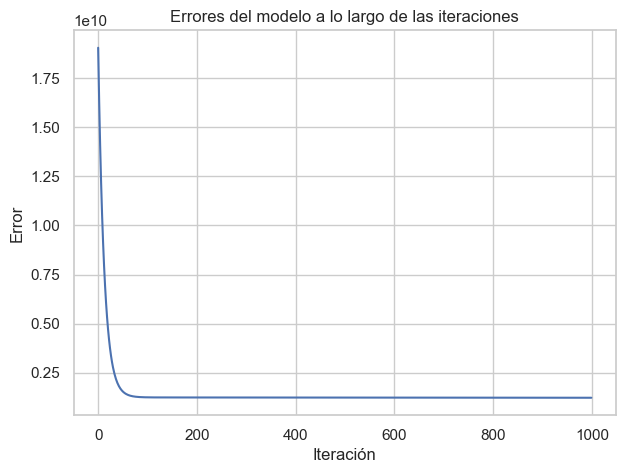

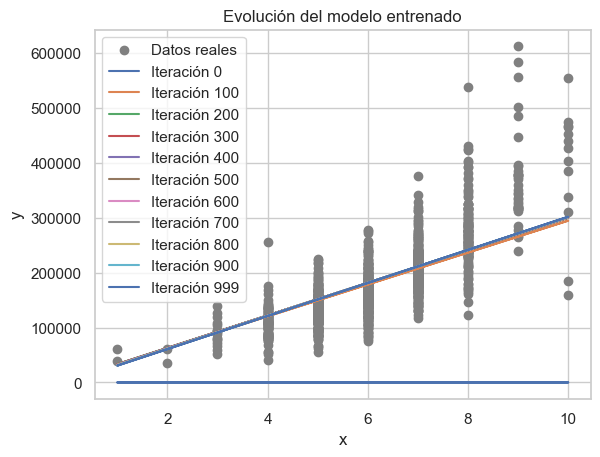

In [51]:
# Probando la clase linear_reg

# Seleccionar 'OverallQual' como la variable independiente 'x' y 'SalePrice' como variable dependiente 'y'
x = ochenta_x_ciento_df['OverallQual'].values
y = ochenta_x_ciento_df['SalePrice'].values

# Inicializar y entrenar el modelo de regresión lineal con la clase 'univ_linear_reg'
modelo = linear_reg(x, y, epochs=1000, imprimir_error_cada=100, learning_rate=0.001)
modelo.entrenar()

# Visualizar el error a lo largo de las iteraciones
modelo.error_plot(modelo.errors)

# Visualizar cómo evoluciona el modelo entrenado con respecto a los datos
modelo.model_plot(modelo.models, x, y, n=100)

In [57]:
# Imputador para reemplazar valores NaN por la media de la columna
imputer = SimpleImputer(strategy='mean')

# Variables seleccionadas para entrenar modelos de regresión lineal
variables_x = ['OverallQual', 'First Floor Square Feet', 'totRoomAbov', 'YearBuilt', 'LinearFeetStrconnecproperty']

# Entrenar un modelo de regresión lineal para cada variable x
modelos = {}
for var in variables_x:
    x = ochenta_x_ciento_df[[var]].values  # Seleccionar la columna como DataFrame para mantener la estructura bidimensional
    x_imputed = imputer.fit_transform(x)  # Imputar los valores NaN
    y = ochenta_x_ciento_df['SalePrice'].values  # Variable dependiente
    
    # Crear y entrenar el modelo
    modelo = LinearRegression()
    modelo.fit(x_imputed, y)
    
    # Almacenar el modelo entrenado
    modelos[var] = modelo

    # Imprimir los coeficientes del modelo
    print(f"Modelo para {var}: intercepto = {modelo.intercept_}, pendiente = {modelo.coef_[0]}")

Modelo para OverallQual: intercepto = -84719.60382992754, pendiente = 43429.43214062005
Modelo para First Floor Square Feet: intercepto = 45760.02545548626, pendiente = 115.052699293369
Modelo para totRoomAbov: intercepto = 20772.210565051937, pendiente = 24489.475721998067
Modelo para YearBuilt: intercepto = -2406639.3389937747, pendiente = 1311.973280348617
Modelo para LinearFeetStrconnecproperty: intercepto = 111008.57532604804, pendiente = 985.5467535900333


In [63]:
def calcular_predicciones(modelo_manual, modelo_sklearn, x):
    
    # Asegurandose de que no haya NaN en las predicciones antes de retornar
    pred_manual[np.isnan(pred_manual)] = 0
    pred_sklearn[np.isnan(pred_sklearn)] = 0
    pred_promedio[np.isnan(pred_promedio)] = 0
    
    return pred_manual, pred_sklearn, pred_promedio



Iteración: 0, Error: 19050580471.421284
Iteración: 100, Error: 1244624057.9800467
Iteración: 200, Error: 1237765573.7140424
Iteración: 300, Error: 1235966921.9363787
Iteración: 400, Error: 1234186674.1095142
Iteración: 500, Error: 1232423241.6448662
Iteración: 600, Error: 1230676465.3156037
Iteración: 700, Error: 1228946187.7995446
Iteración: 800, Error: 1227232253.2605731
Iteración: 900, Error: 1225534507.3344922


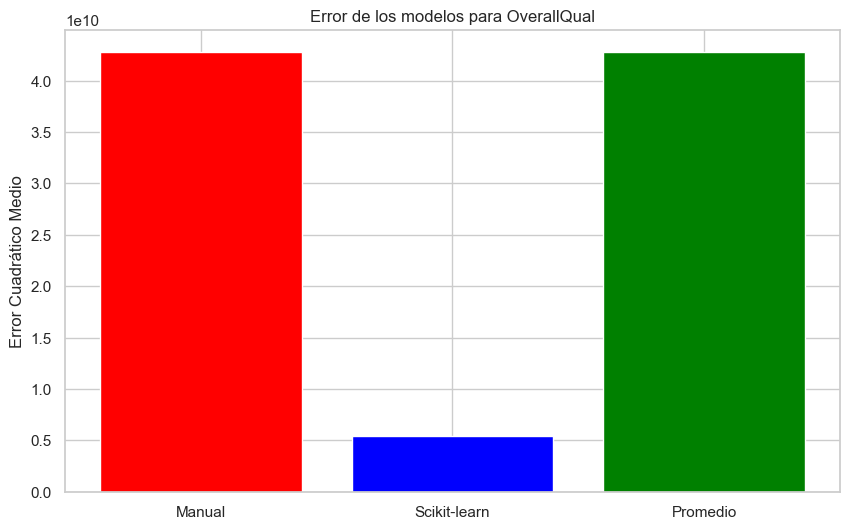

Iteración: 0, Error: 18995096198.97834
Iteración: 100, Error: nan
Iteración: 200, Error: nan
Iteración: 300, Error: nan
Iteración: 400, Error: nan
Iteración: 500, Error: nan
Iteración: 600, Error: nan
Iteración: 700, Error: nan
Iteración: 800, Error: nan
Iteración: 900, Error: nan


/var/folders/lk/vgj59j9n38q9szt_w2c7gxq80000gp/T/ipykernel_33249/2573886829.py:25: RuntimeWarning: overflow encountered in square
  error = np.sum((self.y - y_pred) ** 2) / (2 * len(self.y))
/var/folders/lk/vgj59j9n38q9szt_w2c7gxq80000gp/T/ipykernel_33249/2573886829.py:35: RuntimeWarning: invalid value encountered in subtract
  self.betas -= self.learning_rate * gradientes


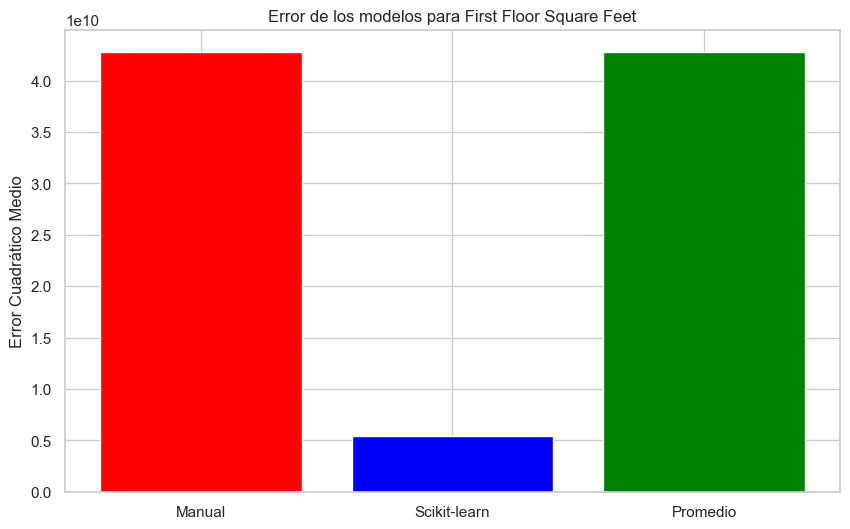

Iteración: 0, Error: 19048919555.37872
Iteración: 100, Error: 2070537588.625167
Iteración: 200, Error: 2069020686.4875128
Iteración: 300, Error: 2068930275.6809516
Iteración: 400, Error: 2068841000.0731652
Iteración: 500, Error: 2068752728.5634432
Iteración: 600, Error: 2068665449.8486967
Iteración: 700, Error: 2068579152.762901
Iteración: 800, Error: 2068493826.2656155
Iteración: 900, Error: 2068409459.440574


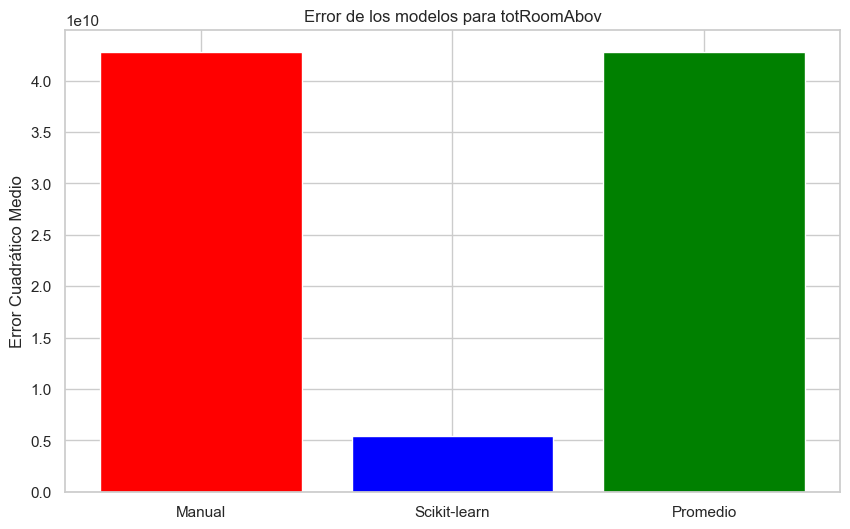

Iteración: 0, Error: 19475835236.857994
Iteración: 100, Error: nan
Iteración: 200, Error: nan
Iteración: 300, Error: nan
Iteración: 400, Error: nan
Iteración: 500, Error: nan
Iteración: 600, Error: nan
Iteración: 700, Error: nan
Iteración: 800, Error: nan
Iteración: 900, Error: nan


/var/folders/lk/vgj59j9n38q9szt_w2c7gxq80000gp/T/ipykernel_33249/2573886829.py:25: RuntimeWarning: overflow encountered in square
  error = np.sum((self.y - y_pred) ** 2) / (2 * len(self.y))
/var/folders/lk/vgj59j9n38q9szt_w2c7gxq80000gp/T/ipykernel_33249/2573886829.py:35: RuntimeWarning: invalid value encountered in subtract
  self.betas -= self.learning_rate * gradientes


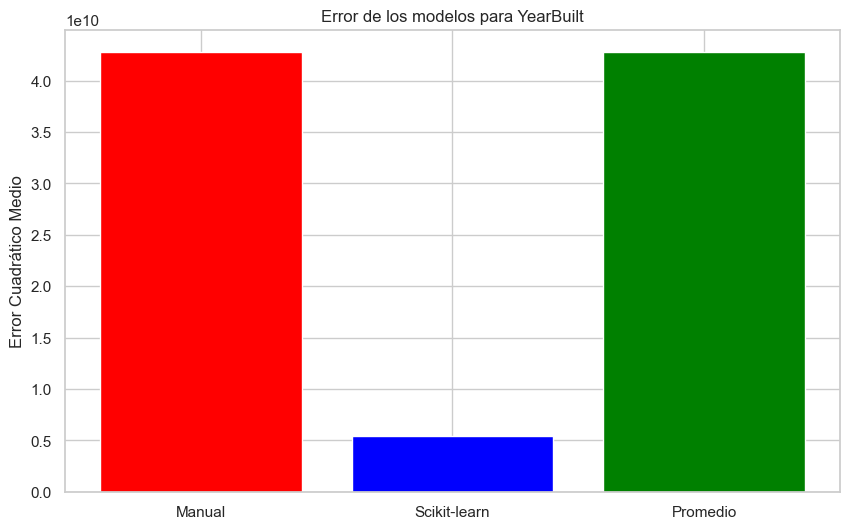

Iteración: 0, Error: nan
Iteración: 100, Error: nan
Iteración: 200, Error: nan
Iteración: 300, Error: nan
Iteración: 400, Error: nan
Iteración: 500, Error: nan
Iteración: 600, Error: nan
Iteración: 700, Error: nan
Iteración: 800, Error: nan
Iteración: 900, Error: nan


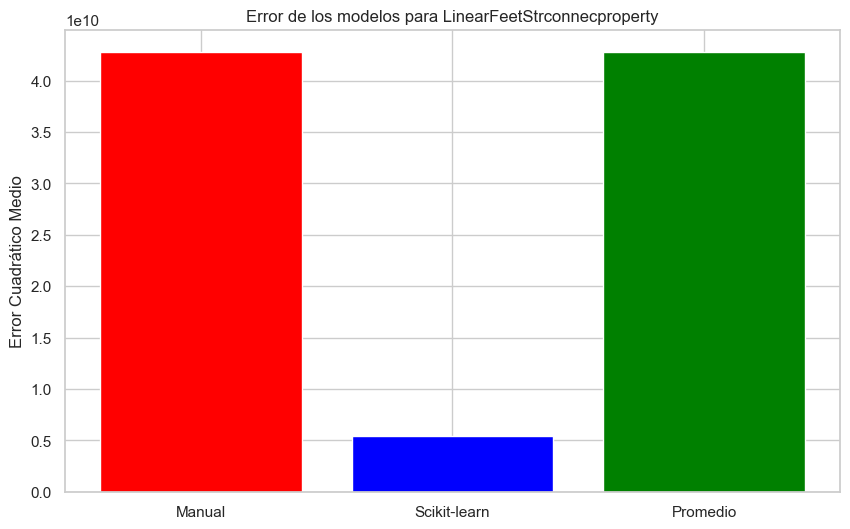

Para la variable OverallQual, el mejor modelo es Scikit-learn con un error de 5401130848.693126
Para la variable First Floor Square Feet, el mejor modelo es Scikit-learn con un error de 5401130848.693126
Para la variable totRoomAbov, el mejor modelo es Scikit-learn con un error de 5401130848.693126
Para la variable YearBuilt, el mejor modelo es Scikit-learn con un error de 5401130848.693126
Para la variable LinearFeetStrconnecproperty, el mejor modelo es Scikit-learn con un error de 5401130848.693126


In [64]:
from sklearn.metrics import mean_squared_error

# Usar el 20% de los datos para validación (test_df ya definido anteriormente)
x_test = test_df[variables_x]
y_test = test_df['SalePrice']

# Almacenar los errores de cada modelo para cada variable
errores_modelos = {}

for var in variables_x:
    # Extraer el modelo entrenado manualmente
    modelo_manual = linear_reg(ochenta_x_ciento_df[var].values, ochenta_x_ciento_df['SalePrice'].values)
    modelo_manual.entrenar()
    
    # Extraer el modelo entrenado con scikit-learn
    modelo_sklearn = modelos[var]
    
    # Calcular predicciones
    pred_manual, pred_sklearn, pred_promedio = calcular_predicciones(modelo_manual, modelo_sklearn, x_test[var].values)
    
    # Calcular el error de cada modelo
    error_manual = mean_squared_error(y_test, pred_manual)
    error_sklearn = mean_squared_error(y_test, pred_sklearn)
    error_promedio = mean_squared_error(y_test, pred_promedio)
    
    errores_modelos[var] = (error_manual, error_sklearn, error_promedio)
    
    # Graficar los errores
    plt.figure(figsize=(10, 6))
    plt.bar(['Manual', 'Scikit-learn', 'Promedio'], [error_manual, error_sklearn, error_promedio], color=['red', 'blue', 'green'])
    plt.title(f'Error de los modelos para {var}')
    plt.ylabel('Error Cuadrático Medio')
    plt.show()

# Analizar cuál modelo es el mejor para cada variable
for var, errores in errores_modelos.items():
    mejor_modelo = np.argmin(errores)
    nombre_modelo = ['Manual', 'Scikit-learn', 'Promedio'][mejor_modelo]
    print(f'Para la variable {var}, el mejor modelo es {nombre_modelo} con un error de {errores[mejor_modelo]}')